# Homework 2 - eCommerce analytics

#### Some useful data set information

- Each row represents an event. There are several different types of events however:
    - **View**: A user viewed a product
    - **Cart**: A user added a product to a shopping cart
    - **Removefromcart**: A user removed a product from the shopping cart
    - **Purchase**: A user purchased a product
    
    
- A typical funnel of a client would be (leading to 3 different rows in the dataset: view >> cart >> purchase)


- **event_time**: Time of the event
- **event_type**: Event type (see above for event types)
- **product_id**: Unique identifier of product
- **category_id**: Category ID of product
- **category_code**: Code of category. If product is not a relevant one the category code is left empty (meaningfull missing)
- **brand**: Brand of product (can be missing, I guess this is not a meaningful missing)
- **price**: Float price of product
- **user_id**: Unique identifier of user
- **user_session**: Unique identifier of user session (1 *user_id* can have several *user_session* over time)


- **Example**: User with *userid* during session *usersession* added to shopping cart (*eventtype == cart*) the product *productid* of the brand *brand* of category *categorycode* with a given *price* at a given *event_time* 


In [4]:
%load_ext autoreload
%autoreload 2

## Dataset used
We used the dataset of seven months ,from October 2019 to April 2020. We realized  that them are too large,over 40 millions of rows,this is a lot of data for our computer’s memory to handle.To make computations on this datasets, it’s efficient to process the datasets in chunks, one after another.Once we have clean and filtered the chunks we concatenated them and worked on the processed data set. All the function had be optimized in order to be processed in shortest time possible.

#### Import library and files

In [3]:
import pickle
import pandas as pd
import functionality_new as funcs
import seaborn as sns

## Research Question 1 ~ Customer's journey

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
- How many times, on average, a user views a product before adding it to the cart?
- What’s the probability that products added once to the cart are effectively bought?
- What’s the average time an item stays in the cart before being removed?
- How much time passes on average between the first view time and a purchase/addition to cart?

Before getting into the specific questions we would like to highlight some interesting observations we have done on the data (data issues) and discuss how we are planning to overcome/treat them:

- The Funnel is not necesarilly view>>cart>>purchase. A user can view a product and buy it without having to put it into the cart. No action needed for this point but it is good to keep in mind when reviewing final results.

- We have observed that for unique user_sessions we can have different user_ids. We consider this to be an issue on the user_id value since the event_time in general seem to be very close to each other (we consider it hard that in seconds a person is able to change user_id while still having the same user_session). Since we have not found a clear pattern on how to fix this issue we will ignore it for now (also since the amount of cases in which this occurs is almost insignificant)

Question 1.a.

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


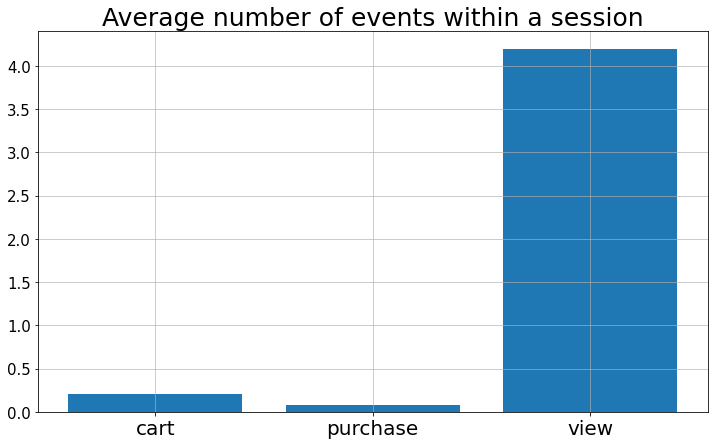

In [76]:
events_per_session = funcs.events_per_session(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'])

From the above chart it can be seen that in average within a session user views products significantly more times rather than adding to cart or purchasing it. Which is logical for any type of shopping. Also the users add items to cart more frequently than purchasing them, showing that about half of the items that were added to cart are eventually bought.

Question 1.b.

Number of views before first view and first cart at unique product_id and user_id level

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv
data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


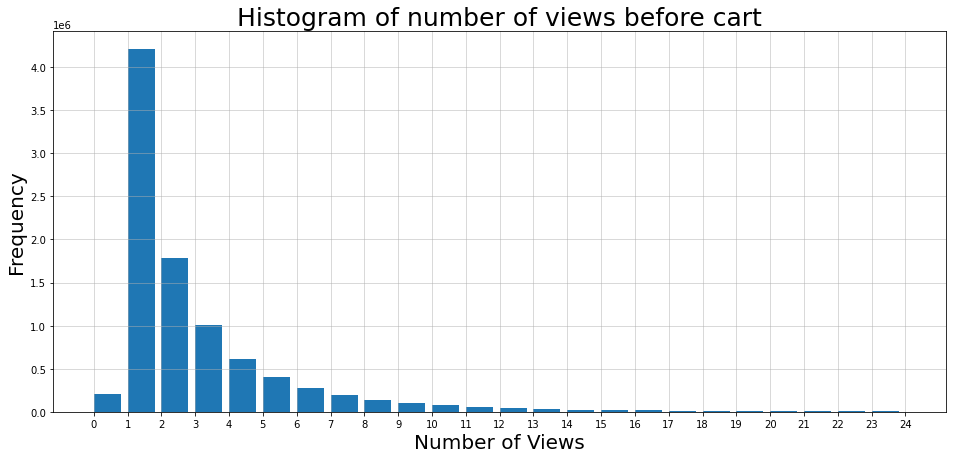

In [7]:
view_before_cart = funcs.average_views_before_cart(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                              'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                              'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                              'data/2020-Apr.csv'])

It was found that in average an item is viewed 2.89 times before being added to the cart. From the histogram it can be seen that there is again a peculiar cases similar to purchase an item without adding to the cart, there are cases of adding items to the cart without viewing it. Otherwise items were viewed mostly between 1 and 10 times.

Question 1.c.

In [8]:
probability = funcs.probability_purchase_given_cart(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                               'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                               'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                               'data/2020-Apr.csv'])

In [9]:
print("probability is", probability)

probability is 0.5975983981084247


To find probability of item that is added to cart to be eventually bought we found the number of cases when item was added to cart and was purchased and vice versa, added to cart but not purchased. And probability appeared to be 0.598

Question 1.d.

In [ ]:
time_before_discard = funcs.average_time_remove_from_cart(data_sets = ['data/2019-Oct.csv', 'data/2019-Nov.csv'])

In [12]:
print(time_before_discard)

0 days 00:02:24.194444444


Since there is no explicit event idicating discard, we made assumption that an item is discarded if it was not eventually purchased and viewed after cart. For that we chose all purchased products first. Then iterated through all carts and chose those items that were not purchased and viewed after cart.

With our assumption the mean time that an item stayed in cart before being discarded is 2 hours 24 minutes

Question 1.e.

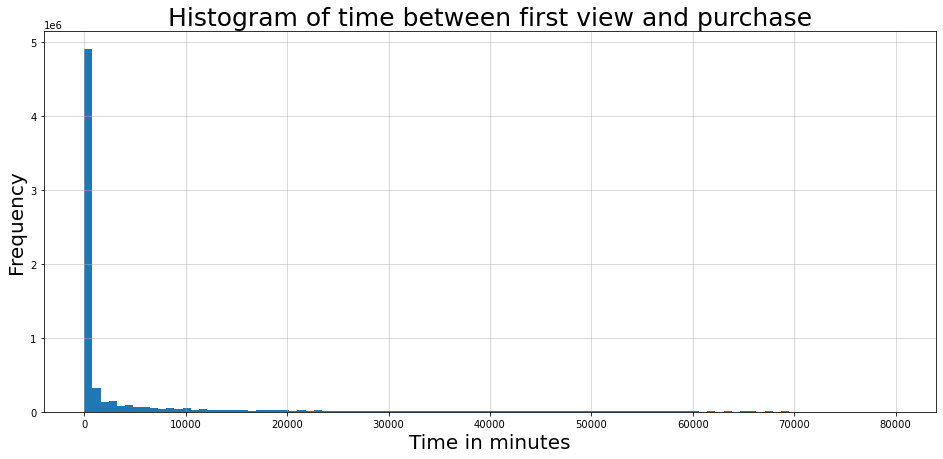

In [10]:
time_before_purchase, average_time_before_purchase = funcs.average_time_between_view_cart_purchase(['data/2019-Oct.csv', 
                                                                                                    'data/2019-Nov.csv',
                                                                                                    'data/2019-Dec.csv', 
                                                                                                    'data/2020-Jan.csv',
                                                                                                    'data/2020-Feb.csv', 
                                                                                                    'data/2020-Mar.csv',
                                                                                                    'data/2020-Apr.csv'])

In [11]:
print(average_time_before_purchase)

5 days 21:16:07.001668230


Average time before being added to cart or purchased is about 5 days. It happened because there were items that were added to cart or purchased a lot later than the first view. Otherwise the items were added to cart or purchased more frequently in shorter period of times.

## Research Question 2  ~ Trending products overall

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories.
- What are the 10 most sold products per category?


data/2019-Oct.csv


data/2019-Nov.csv


data/2019-Dec.csv


data/2020-Jan.csv


data/2020-Feb.csv


data/2020-Mar.csv


data/2020-Apr.csv


[========================================================================] 100%


Finished pre-processing data


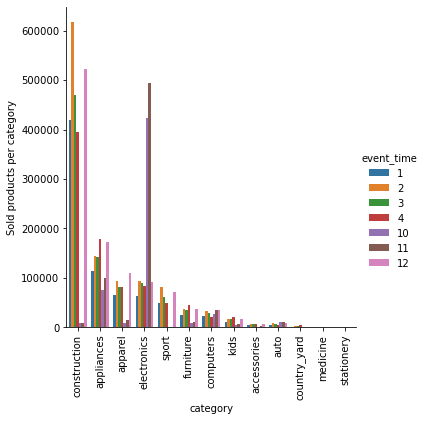

In [2]:
prod_category= funcs.plot_sold_product_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                           'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                           'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                           'data/2020-Apr.csv'])

In [16]:
prod_category

,event_time,category,Sold products per category
0,1,construction,420131
1,1,appliances,114786
2,1,apparel,65842
3,1,electronics,64015
4,1,sport,49785
...,...,...,...
86,12,auto,7722
87,12,accessories,7346
88,12,country_yard,1215
89,12,stationery,462


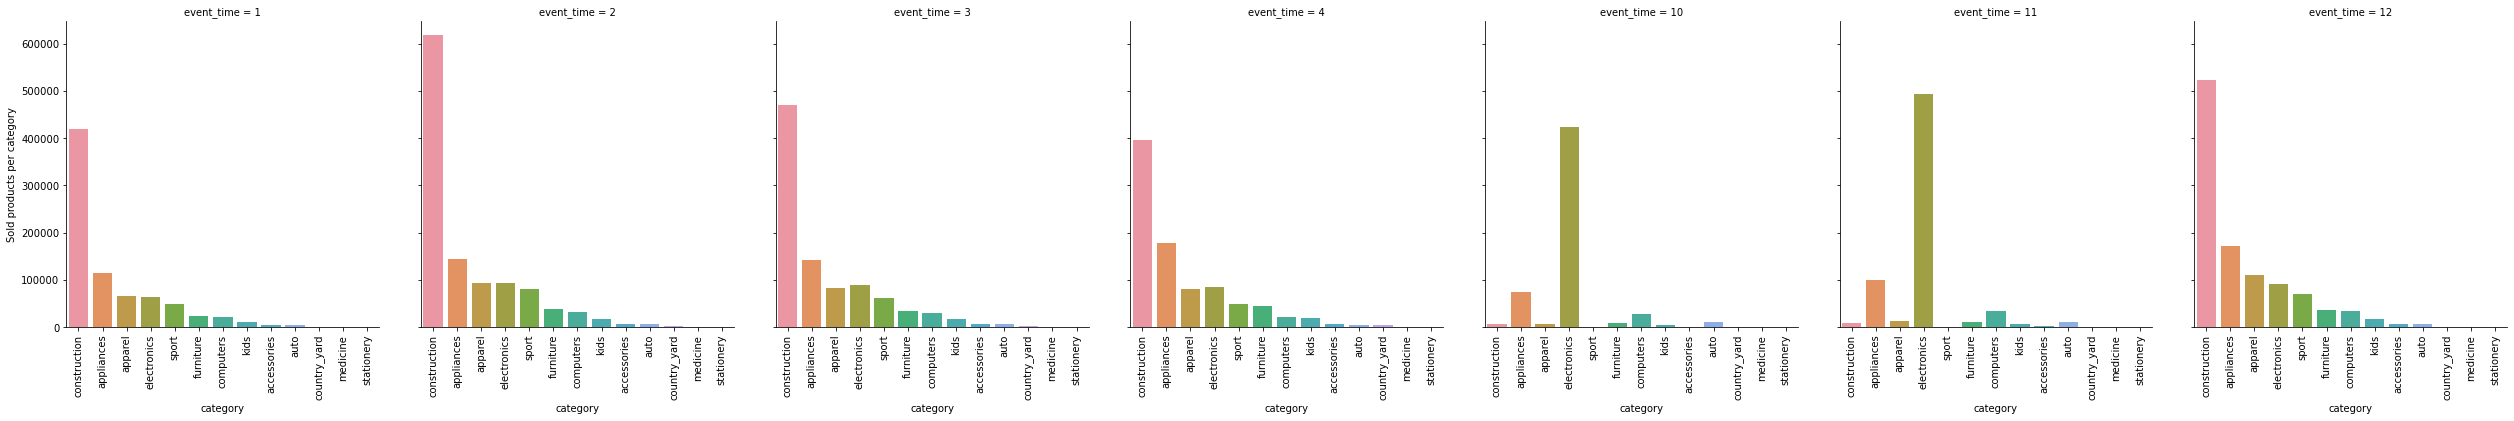

In [14]:
g = sns.catplot(y='Sold products per category',
                x='category',
                col='event_time',
                data=prod_category,
                kind='bar')
g.set_xticklabels(rotation=90)

We plot the result in two different way to be able to do more accurate analysis.In particular the second figure contains seven subplot,one for each month.

As we can see above the category which contains the higher number of sold product,almost in all month, is the category 'construction'(pink bar).This is an expected result because because the household items are similar commodities, they aren't expensive so they can be changed often. We can observe that the second month in which them are most sold is December, most probably due to the Christmas Holidays.

data/2019-Oct.csv


data/2019-Nov.csv


data/2019-Dec.csv


data/2020-Jan.csv


data/2020-Feb.csv


data/2020-Mar.csv


data/2020-Apr.csv


[========================================================================] 100%


Finished pre-processing data


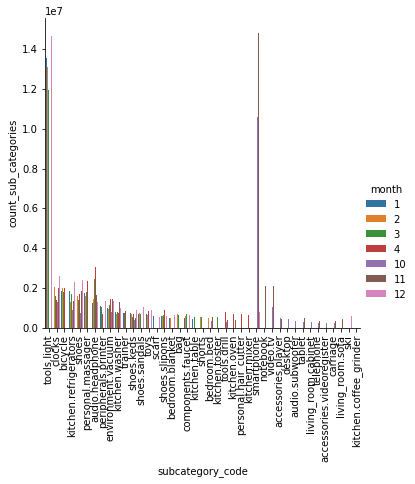

In [18]:
subcategories_visits = funcs.plot_visited_product_subcategory(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                                         'data/2020-Apr.csv'])

A similar result is for subcategory,the two most sold product are tool light, we just imagine that they are in every rooms of every house, and smartphone, considered that in every family there are in average 4.6 devices(Censis 2019).

In [20]:
ten_most_sold = funcs.ten_most_sold(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                               'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                               'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                               'data/2020-Apr.csv'])

data/2019-Oct.csv


data/2019-Nov.csv


data/2019-Dec.csv


data/2020-Jan.csv


data/2020-Feb.csv


data/2020-Mar.csv


data/2020-Apr.csv


[========================================================================] 100%


Finished pre-processing data


In [21]:
ten_most_sold

,event_time,category,product_id,totale_pezzi
197385,10,electronics,1004856,28944
197317,10,electronics,1004767,21806
197364,10,electronics,1004833,12697
197554,10,electronics,1005115,12543
198861,10,electronics,4804056,12381
...,...,...,...,...
164947,4,country_yard,40500134,76
165291,4,country_yard,100118222,65
164950,4,country_yard,40500137,65
164836,4,country_yard,21700004,60


Expanding this dataframe we can observe the ten most sold product for category.This kind of table is usefoul for every company for planning their purchase plans and can organize to the best their storages.

## Research Question 3 ~ Price

For each category, what’s the brand whose prices are higher on average?
- Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


Running data_set: data/2019-Oct.csv
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
Running data_set: data/2019-Nov.csv
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
Running data_set: data/2019-Dec.csv
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
Running data_set: data/2020-Jan.csv
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
Running data_set: data/2

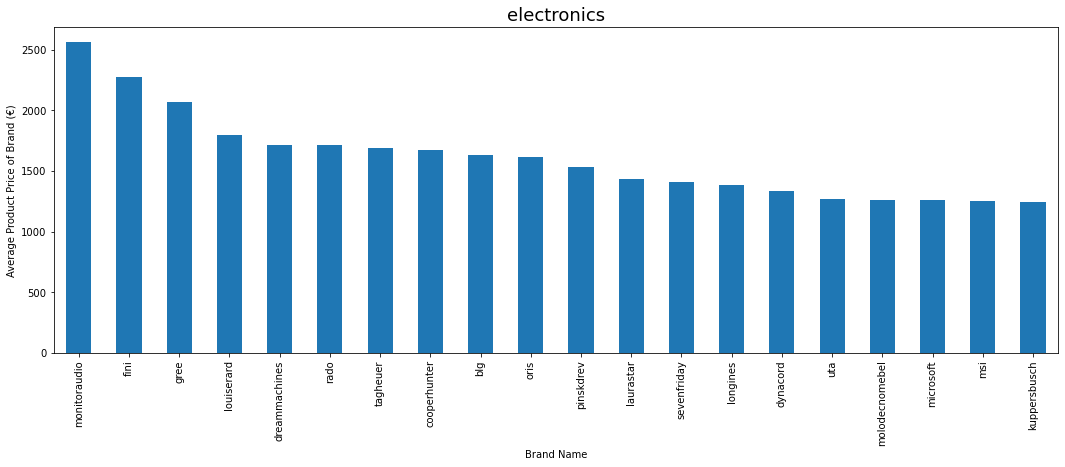

In [3]:
funcs.plot_average_price_brand_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                   'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                   'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                   'data/2020-Apr.csv'],
                                        category='electronics')

In [4]:
sorted_series, highest_price_brands = funcs.category_brand_highest_price(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                   'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                   'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                   'data/2020-Apr.csv'])

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


Running data_set: data/2019-Dec.csv


Running data_set: data/2020-Jan.csv


Running data_set: data/2020-Feb.csv


Running data_set: data/2020-Mar.csv


Running data_set: data/2020-Apr.csv


[========================================================================] 100%


Finished pre-processing data


In [5]:
sorted_series

parent_category  brand                
accessories      helix                    1785.954607
                 zelenyjpogruznojnasos    1613.326725
                 dji                      1313.854477
                 livnynasos               1283.734388
                 gmslivgidromasao         1156.157061
                                             ...     
unknown_brand    fitness                     0.360000
                 pedigree                    0.270000
                 chappi                      0.210000
                 friskies                    0.200000
                 mactea                      0.140000
Name: price, Length: 16199, dtype: float64

In [6]:
highest_price_brands.sort_values(ascending=False)

parent_category  brand       
furniture        florencemode    2570.980000
electronics      monitoraudio    2561.200000
apparel          knief           2547.530000
computers        cime            2537.373750
construction     zipp            2522.200000
unknown_brand    tempur          2520.010000
appliances       pinarello       2483.720000
sport            pinarello       2470.850000
auto             femi            2279.465000
country_yard     shua            2071.505000
accessories      helix           1785.954607
kids             minimotors      1591.406515
stationery       dewalt           923.767500
medicine         hayali           267.884000
Name: price, dtype: float64

### Results

From this analysis we can see the brands of each category that have the highest prices on average (in the pd.series *sorted_series* we can even get a feeling of all the brands sorted by average price).

It is interesting to observe how the most expensive brand of each category has a similar highest brand price (mainly from furniture to country_yard categories).

## Research Question 4 ~ Profit

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
- Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).


data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


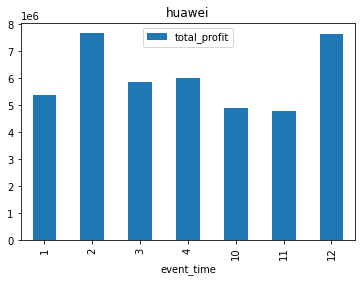

In [3]:
brand_losses = funcs.plot_profit_for_brand(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                'data/2020-Apr.csv'],
                                     brand='huawei')

In this function we wanted to observe if there is a trend in the profits of the brand Huawei.
There are some local maxima produced by seasonality effects, but the max gap isn't too large infact Huawei is a by now a brand affirmed in the sector so its profits are almost constant.

In [6]:
brand_losses

,brand,Max Loss between months,Months of loss
134,apple,-67027272.40,March to April
2074,samsung,-10384065.88,April to October
2595,xiaomi,-5142527.73,February to March
1349,lg,-4151504.88,April to October
1391,lucente,-3594985.70,March to April
...,...,...,...
3306,sman,13453.38,March to April
2024,rongtai,14414.79,January to February
3204,kingrun,15673.32,March to April
3134,decathlon,309419.39,March to April


With respect to the maximum profit losses, we can observe how apple, xiaomi and lucente had huge losses at the beginning of the coronavirus pandemic. Instead other brands such as decathlon and thermomix performed extremely well during this pandemic strart (people started having time to cook and do more sports). 

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


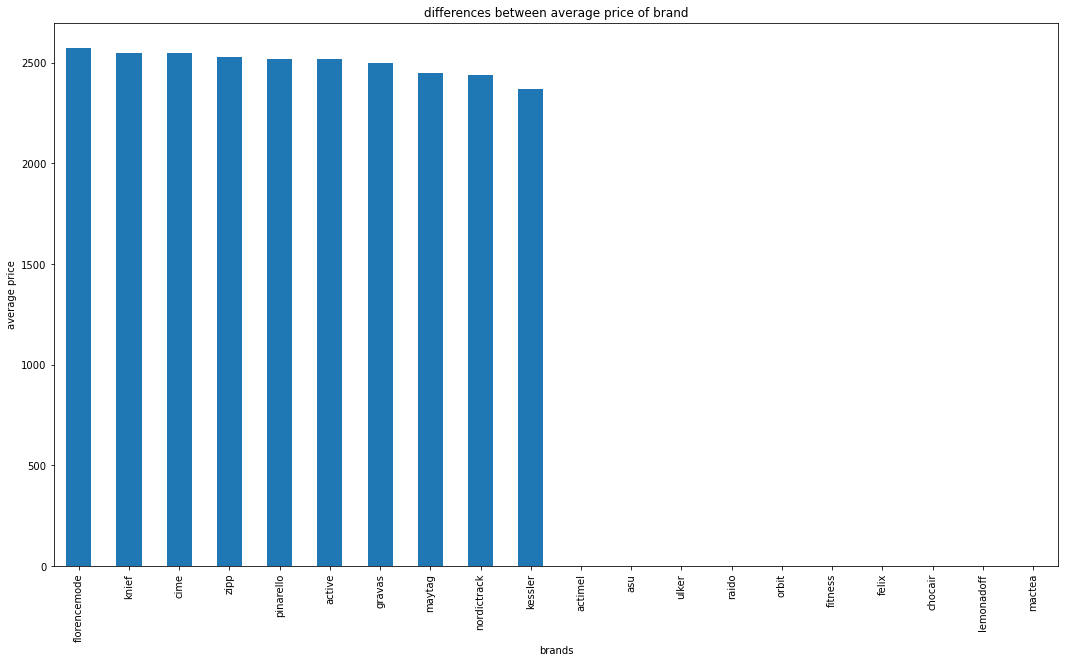

In [18]:
brand_price_difference = funcs.plot_average_price_brand(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                             'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                             'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                             'data/2020-Apr.csv'])

There average price of different brand are very diferent,it depends on different points: for example the average profit of the customers it refers to, raw material, cost of labour and by the imagine of the brand.

## Research Question 5 ~ Hourly views

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.


data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


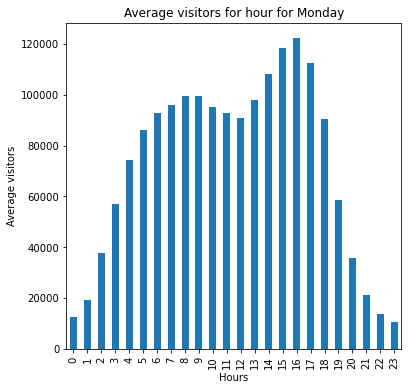

In [12]:
visits_per_day = funcs.plot_hourly_average_visitors(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'],
                                                     day='Monday')

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


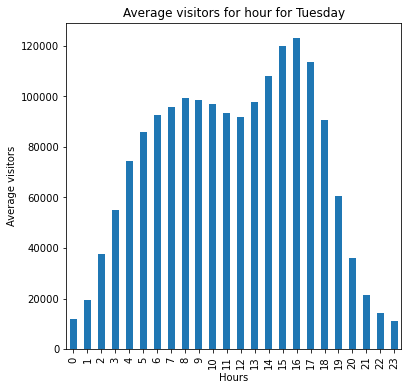

In [12]:
visits_per_day = funcs.plot_hourly_average_visitors(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'],
                                                     day='Tuesday')

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


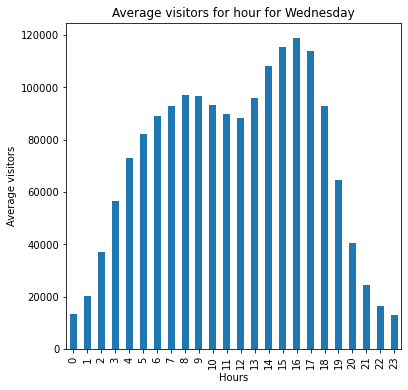

In [13]:
visits_per_day = funcs.plot_hourly_average_visitors(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'],
                                                     day='Wednesday')

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


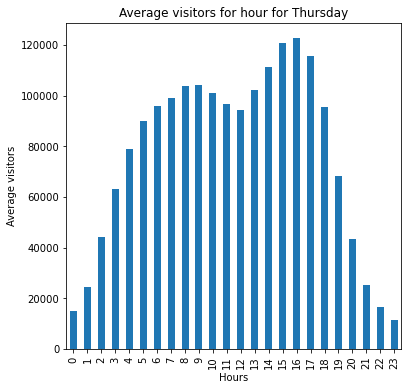

In [14]:
visits_per_day = funcs.plot_hourly_average_visitors(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'],
                                                     day='Thursday')

data/2019-Oct.csv
data/2019-Nov.csv
data/2019-Dec.csv
data/2020-Jan.csv
data/2020-Feb.csv
data/2020-Mar.csv
data/2020-Apr.csv


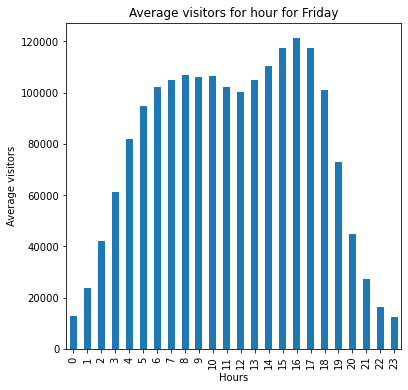

In [15]:
visits_per_day = funcs.plot_hourly_average_visitors(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                         'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                         'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                         'data/2020-Apr.csv'],
                                                     day='Friday')

As we can see the better moment for inserting in advertising or make offers on different product to maximize sales is the early afternoon. This is a consistent trend throughout all of the days of the week.

## Research Question 6 ~ Conversion Rates

The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
- Find the overall conversion rate of your store.
- Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [7]:
conversion_rate = funcs.conversion_rate(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                   'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                   'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                   'data/2020-Apr.csv'])
conversion_rate

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


Running data_set: data/2019-Dec.csv


Running data_set: data/2020-Jan.csv


Running data_set: data/2020-Feb.csv


Running data_set: data/2020-Mar.csv


Running data_set: data/2020-Apr.csv


[========================================================================] 100%


0.0178

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


Running data_set: data/2019-Dec.csv


Running data_set: data/2020-Jan.csv


Running data_set: data/2020-Feb.csv


Running data_set: data/2020-Mar.csv


Running data_set: data/2020-Apr.csv


[========================================================================] 100%


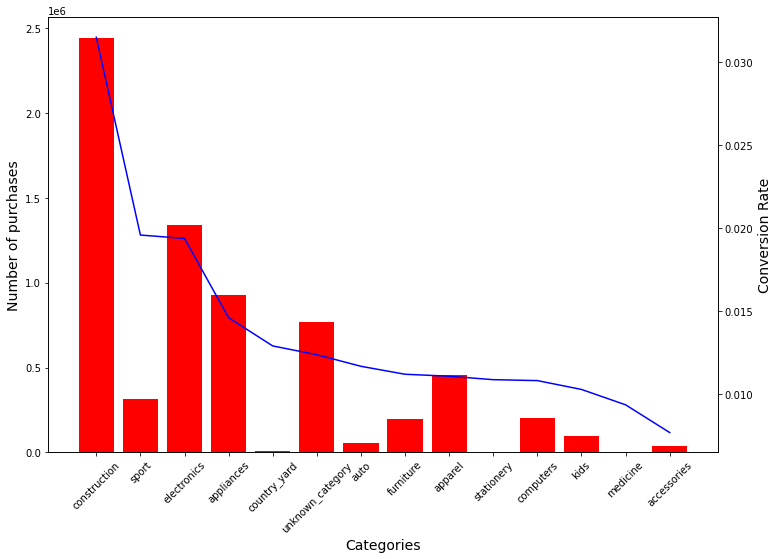

In [8]:
tot = funcs.conversion_rate_per_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                   'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                   'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                   'data/2020-Apr.csv'])

### Results

The overall conversion rate of the online shop is of 1.78%, a relatively low percentage. This however is a justified number given the world in which we live now-a-days (we can choose from a huge amount of products and never have to worry about something going out of stock, allowing us to take our time when choosing which product to purchase).

If we look into this conversion rate a bit more in detail (specifically at category level) we can see how some categories are able to increase this overall conversion rate. Specifically the category *construction* has a conversion rate above 3% (people that look for construction products tend to have a real need for this product) while the *accessories* category has a very low rate (accessories are usually not a priority and their purchase can usually be post-poned).

We can also observe that the number of purchases is not at all related with the conversion rate, as one would expect.

## Research Question 7 ~ Pareto Principle

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
- Prove that the pareto principle applies to your store.


Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


Running data_set: data/2019-Dec.csv


Running data_set: data/2020-Jan.csv


Running data_set: data/2020-Feb.csv


Running data_set: data/2020-Mar.csv


Running data_set: data/2020-Apr.csv


[========================================================================] 100%


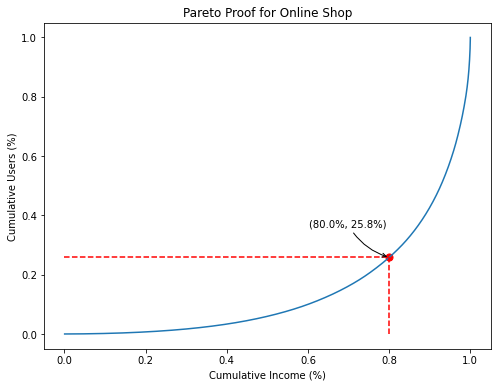

In [9]:
funcs.pareto_proof_online_shop(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv',
                                                   'data/2019-Dec.csv', 'data/2020-Jan.csv',
                                                   'data/2020-Feb.csv', 'data/2020-Mar.csv',
                                                   'data/2020-Apr.csv'], 
                               income_threshold=0.8)

### Results

Based on the previous graph we can conclude that the pareto principle is approximately fulfilled for our online shop (**80% of the income is generated by 25.8% of the users**).

The slop of the pareto is also in line with what we would expect.